# Cloning Quasar

First, let's try to visualise the data set

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

nBins = 100

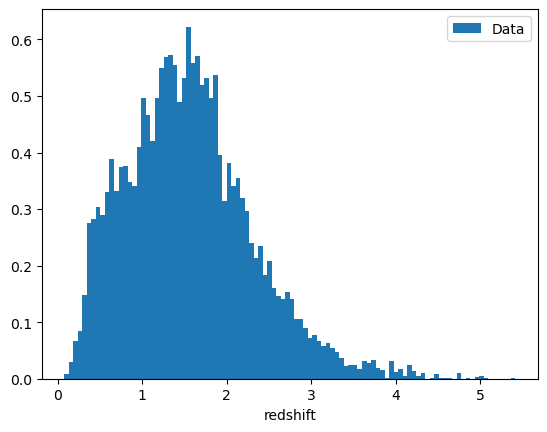

In [34]:
plt.hist(z, nBins, density=True, label='Data')
plt.xlabel('redshift')
plt.legend()
plt.show()

<small>I thought that it could be a Poissonian distribution, but it isn't (I looked at the solution...) </small>


$\rightarrow $ Let's sample!
First, we make a "scipy.stats random variable object" from our histogram

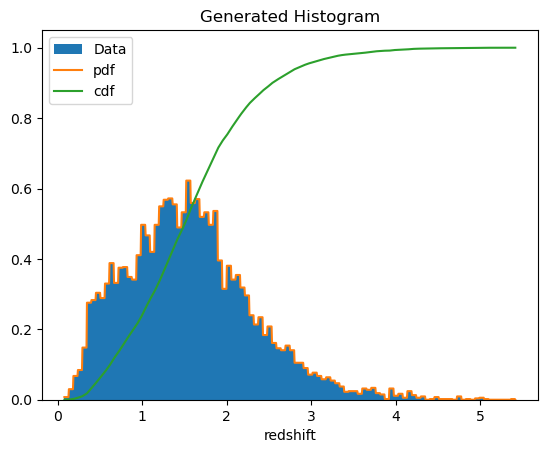

In [35]:
import scipy.stats

counts, bins = np.histogram(z, bins=nBins, density=True)

h = scipy.stats.rv_histogram((counts, bins))
x = np.linspace(min(z), max(z), 1000)

plt.hist(z, nBins, density=True, label='Data')
plt.plot(x, h.pdf(x), label='pdf')
plt.plot(x, h.cdf(x), label='cdf')
plt.xlabel('redshift')
plt.title('Generated Histogram')
plt.legend()
plt.show()

Now we are neady to sample from $h(x)$

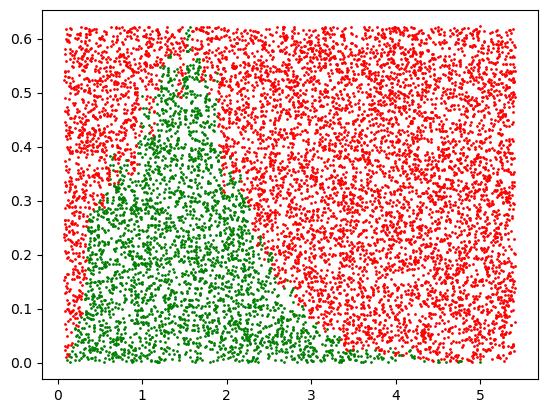

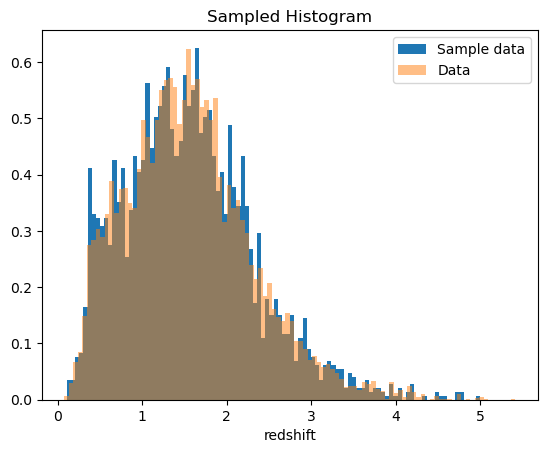

In [38]:
N = 10000

ymax = counts.max() 

xrandom = np.random.uniform(min(z), max(z), N)
yrandom = np.random.uniform(0, ymax, N)

plt.scatter(xrandom[yrandom < h.pdf(xrandom)], yrandom[yrandom < h.pdf(xrandom)], c='green', s=1)
plt.scatter(xrandom[yrandom > h.pdf(xrandom)], yrandom[yrandom > h.pdf(xrandom)], c='red', s=1)
plt.show()

goodpoints = xrandom[yrandom < h.pdf(xrandom)]

plt.hist(goodpoints, bins=nBins, density=True, label='Sample data')
plt.hist(z, nBins, density=True, label='Data', alpha=0.5)
plt.xlabel('redshift')
plt.title('Sampled Histogram')
plt.legend()
plt.show()

The agreement becomes better and better the more I increase $N$.